# Case 1

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
!pip install lightgbm

In [3]:
!pip install shap

In [4]:
rg=pd.read_excel('X2반영.xlsx')
rg.head()

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율,평균평점,긍정확률 평균
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,944,38664,2.44,3,0.014151,4.818182,0.935579
1,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,944,38664,2.44,3,0.024590,4.818182,0.935579
2,[La belle rose]페이어 유넥티,139,20,1404200,825,9366,8.81,3,0.021583,4.637306,0.826701
3,[La belle rose]페이어 유넥티,80,12,802400,825,9366,8.81,3,0.037500,4.637306,0.826701
4,[La belle rose]페이어 유넥티,64,14,590000,825,9366,8.81,3,0.046875,4.637306,0.826701


In [5]:
rg.shape

(35, 11)

In [6]:
rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문상품명    35 non-null     object 
 1   주문수      35 non-null     int64  
 2   환불수      35 non-null     int64  
 3   매출액      35 non-null     int64  
 4   담긴수      35 non-null     int64  
 5   노출수      35 non-null     int64  
 6   담김율      35 non-null     float64
 7   반품수량     35 non-null     int64  
 8   반품비율     35 non-null     float64
 9   평균평점     35 non-null     float64
 10  긍정확률 평균  35 non-null     float64
dtypes: float64(4), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
rg.loc[:,'주문상품명'] = rg.loc[:,'주문상품명'].astype('category').cat.codes

In [8]:
rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문상품명    35 non-null     int8   
 1   주문수      35 non-null     int64  
 2   환불수      35 non-null     int64  
 3   매출액      35 non-null     int64  
 4   담긴수      35 non-null     int64  
 5   노출수      35 non-null     int64  
 6   담김율      35 non-null     float64
 7   반품수량     35 non-null     int64  
 8   반품비율     35 non-null     float64
 9   평균평점     35 non-null     float64
 10  긍정확률 평균  35 non-null     float64
dtypes: float64(4), int64(6), int8(1)
memory usage: 2.9 KB


In [13]:
X=rg.drop('매출액',axis=1)
y=rg['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31, 10), (4, 10), (31,), (4,))

In [14]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = X_train, label = y_train) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(X_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))) # RMSE

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 942645.161290
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Found `n_estimators` in params. Will use it instead of argument


In [15]:
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test)

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


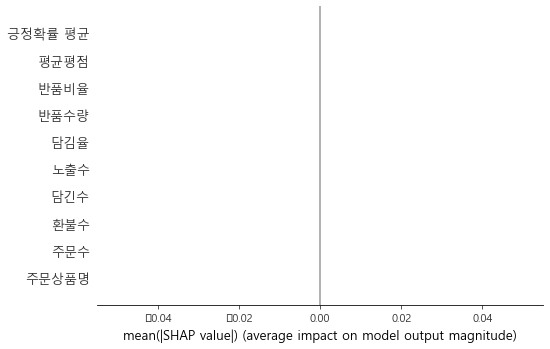

In [16]:
from matplotlib import font_manager,rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
shap.summary_plot(shap_values, X_test, plot_type = "bar")

# Case 2

In [17]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [18]:
rg.head()

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율,평균평점,긍정확률 평균
0,3,212,34,5304400,944,38664,2.44,3,0.014151,4.818182,0.935579
1,3,122,16,3158800,944,38664,2.44,3,0.024590,4.818182,0.935579
2,6,139,20,1404200,825,9366,8.81,3,0.021583,4.637306,0.826701
3,6,80,12,802400,825,9366,8.81,3,0.037500,4.637306,0.826701
4,6,64,14,590000,825,9366,8.81,3,0.046875,4.637306,0.826701


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기'
feature=['매출액']
X=rg.drop(feature,axis=1)
y=np.asarray(rg['매출액'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
forest = RandomForestClassifier(n_estimators=100)
#오류발생부분
#forest.fit(X_train,y_train)

In [20]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
forest.feature_importances_

array([0.07473395, 0.20566288, 0.18609875, 0.06842238, 0.07833484,
       0.05113273, 0.02987   , 0.17806231, 0.06688329, 0.06079886])

<BarContainer object of 10 artists>

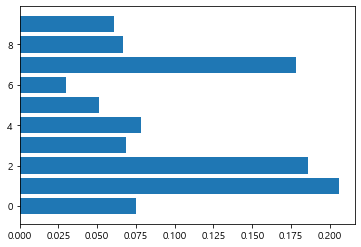

In [22]:
plt.barh(range(10), forest.feature_importances_, align='center')

In [25]:
delete_columns=rg.columns.drop('매출액')
delete_columns

Index(['주문상품명', '주문수', '환불수', '담긴수', '노출수', '담김율', '반품수량', '반품비율', '평균평점',
       '긍정확률 평균'],
      dtype='object')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.000
특성 중요도 : 
[0.07473395 0.20566288 0.18609875 0.06842238 0.07833484 0.05113273
 0.02987    0.17806231 0.06688329 0.06079886]


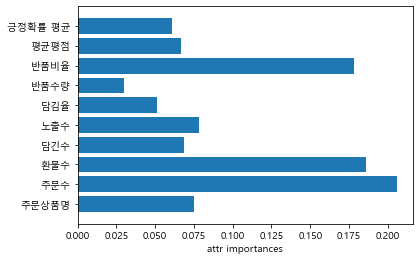

In [26]:

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))
# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = 10
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),delete_columns)
    plt.xlabel("attr importances")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(forest)

# Case 3

In [27]:
!pip install xgboost

In [28]:
import xgboost

print(xgboost.__version__)

1.3.3


In [29]:
rg.head()

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율,평균평점,긍정확률 평균
0,3,212,34,5304400,944,38664,2.44,3,0.014151,4.818182,0.935579
1,3,122,16,3158800,944,38664,2.44,3,0.024590,4.818182,0.935579
2,6,139,20,1404200,825,9366,8.81,3,0.021583,4.637306,0.826701
3,6,80,12,802400,825,9366,8.81,3,0.037500,4.637306,0.826701
4,6,64,14,590000,825,9366,8.81,3,0.046875,4.637306,0.826701


In [30]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [32]:
X=rg.drop('매출액',axis=1)
y=rg['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28, 10), (7, 10), (28,), (7,))

In [35]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [36]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'reg:squarederror',
           'eval_metric':'logloss'   
        }
num_rounds = 400

In [37]:
wlist = [(dtrain,'train'),(dtest,'eval') ]

In [38]:
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[1]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[2]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[3]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[4]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[5]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[6]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[7]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[8]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[9]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[10]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[11]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[12]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[13]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[14]	train-logloss:-35100568.00000	eval-logloss:-22701610.00000
[15]	train-logloss:-35100568.00000	eval-logloss:-2

In [39]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

[ 345353.1   175759.44  462185.22  652698.8  1023273.8   463375.88
 1162352.6 ]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1]


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred, average='micro')
    recall = recall_score(y_test , pred, average='micro')
    f1 = f1_score(y_test,pred, average='micro')
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [44]:
get_clf_eval(y_test , preds, pred_probs)

ValueError: multi_class must be in ('ovo', 'ovr')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

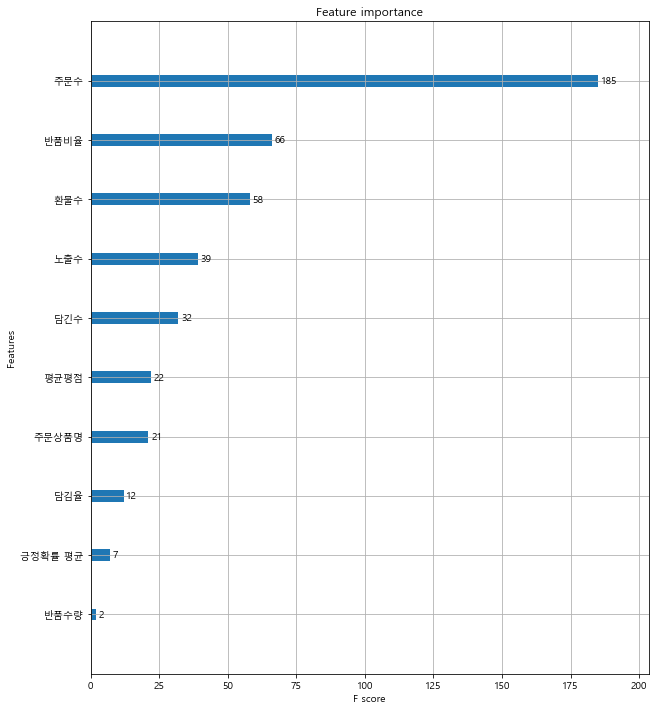

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)